In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [32]:
## Read the data set to python environmnet
df =pd.read_csv('Sales_data_zone_wise.csv')
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [33]:
df.isna().sum() ## data is clean with no null values

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

# The mean sales generated by each zone.

In [34]:
df[['Zone - A','Zone - B','Zone - C','Zone - D']].mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

In [35]:
df['Zone - A'].mean()

1540493.1379310344

In [36]:
df['Zone - B'].mean()

1755559.5862068965

In [37]:
df['Zone - C'].mean()

1772871.0344827587

In [38]:
df['Zone - D'].mean()

1842926.7586206896

# Total sales generated by all the zones for each month.

In [39]:
df['Total_Score'] = df['Zone - A'] +df['Zone - B']+df['Zone - C']+df['Zone - D']
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Score
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


Check whether all the zones generate the same amount of sales.

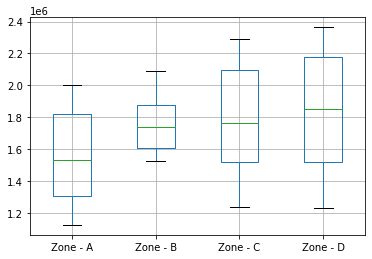

In [40]:
df.boxplot(column=['Zone - A','Zone - B','Zone - C','Zone - D'])
plt.show()

In [41]:
f_value, p_value = stats.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print('f_value=',round(f_value,3))
print('p_value=',round(p_value,3))

f_value= 5.672
p_value= 0.001


In [42]:
if p_value<0.05:
    print('Reject the null hypothesis -all the zones generate the same amount of sales. ')
else:
    print("Accept the null hypothesis-all the zones generate the same amount of sales.")

Reject the null hypothesis -all the zones generate the same amount of sales. 


All zones generate different sales amount